In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix,plot_confusion_matrix,roc_curve,classification_report
from sklearn.metrics import plot_confusion_matrix

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
emotions = pd.read_excel('emotions.xlsx')

In [3]:
emotions.head(10)

,text,emotion
0,That game hurt.,sadness
1,Man I love reddit.,love
2,"[NAME] was nowhere near them, he was by the Fa...",neutral
3,Right? Considering itÃ¢Â€Â™s such an important...,gratitude
4,"He isn't as big, but he's still quite popular....",disapproval
5,that's adorable asf,amusement
6,Sponge Blurb Pubs Quaw Haha GURR ha AAa! final...,amusement
7,"I have, and now that you mention it, I think t...",neutral
8,"I wanted to downvote this, but it's not your f...",disappointment
9,BUT IT'S HER TURN! /s,neutral


In [4]:
emotions.reset_index()

,index,text,emotion
0,0,That game hurt.,sadness
1,1,Man I love reddit.,love
2,2,"[NAME] was nowhere near them, he was by the Fa...",neutral
3,3,Right? Considering itÃ¢Â€Â™s such an important...,gratitude
4,4,"He isn't as big, but he's still quite popular....",disapproval
...,...,...,...
67201,67201,"Before we continue, I would first like to ask ...",neutral
67202,67202,This is great! Can anyone make a request with ...,admiration
67203,67203,IÃ¢Â€Â™m sorry. Can you please explain what ar...,curiosity
67204,67204,No but it should be,neutral


In [5]:
emotions.index.name = 'ID'

In [6]:
emotions.head()

,text,emotion
ID,,
0,That game hurt.,sadness
1,Man I love reddit.,love
2,"[NAME] was nowhere near them, he was by the Fa...",neutral
3,Right? Considering itÃ¢Â€Â™s such an important...,gratitude
4,"He isn't as big, but he's still quite popular....",disapproval


In [7]:
emotions = emotions.reset_index()

In [8]:
emotions.head()

,ID,text,emotion
0,0,That game hurt.,sadness
1,1,Man I love reddit.,love
2,2,"[NAME] was nowhere near them, he was by the Fa...",neutral
3,3,Right? Considering itÃ¢Â€Â™s such an important...,gratitude
4,4,"He isn't as big, but he's still quite popular....",disapproval


In [9]:
emotions.shape

(67206, 3)

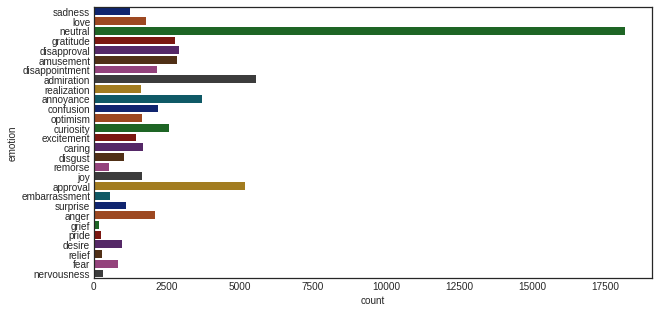

In [10]:
ax=sns.countplot(y="emotion", data=emotions, palette='dark')

In [11]:
emotions.groupby('emotion')['emotion'].nunique()

emotion
admiration        1
amusement         1
anger             1
annoyance         1
approval          1
caring            1
confusion         1
curiosity         1
desire            1
disappointment    1
disapproval       1
disgust           1
embarrassment     1
excitement        1
fear              1
gratitude         1
grief             1
joy               1
love              1
nervousness       1
neutral           1
optimism          1
pride             1
realization       1
relief            1
remorse           1
sadness           1
surprise          1
Name: emotion, dtype: int64

In [12]:
emotions.groupby('emotion')['emotion'].nunique().sum()

28

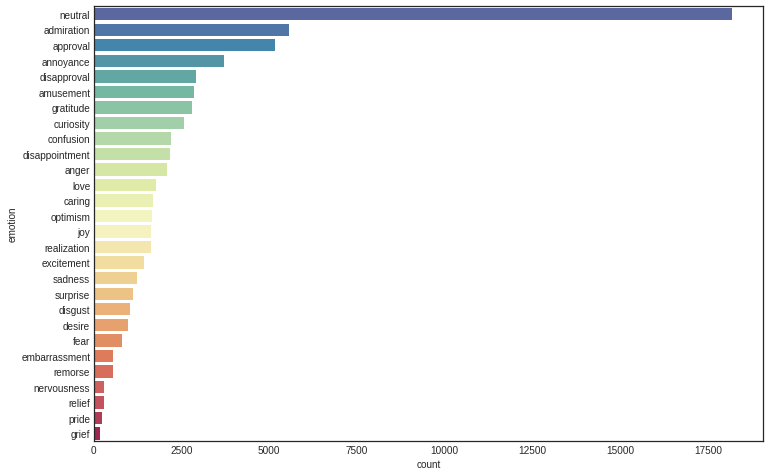

In [13]:
plt.figure(figsize=(12,8))
ax=sns.countplot(y = 'emotion',
              data = emotions, palette='Spectral_r',
              order = emotions['emotion'].value_counts().index)

In [14]:
cnt1 = emotions['emotion'].value_counts()

In [15]:
cnt1.head(10)

neutral           18174
admiration         5555
approval           5156
annoyance          3699
disapproval        2913
amusement          2861
gratitude          2791
curiosity          2578
confusion          2195
disappointment     2171
Name: emotion, dtype: int64

In [16]:
cnt2 = emotions.groupby(['emotion']).size()

In [17]:
cnt2

emotion
admiration         5555
amusement          2861
anger              2076
annoyance          3699
approval           5156
caring             1676
confusion          2195
curiosity          2578
desire              965
disappointment     2171
disapproval        2913
disgust            1019
embarrassment       552
excitement         1439
fear                811
gratitude          2791
grief               164
joy                1640
love               1778
nervousness         301
neutral           18174
optimism           1657
pride               238
realization        1624
relief              290
remorse             536
sadness            1243
surprise           1104
dtype: int64

In [18]:
emocount = pd.DataFrame(emotions.groupby('emotion')['emotion'].count())

In [19]:
emocount

,emotion
emotion,
admiration,5555
amusement,2861
anger,2076
annoyance,3699
approval,5156
caring,1676
confusion,2195
curiosity,2578
desire,965


## **Accessing each comments using index**

In [21]:
emotions['text'].values[0]

'That game hurt.'

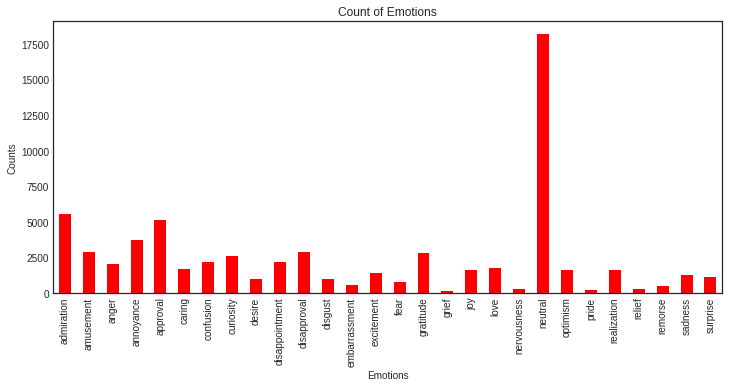

In [22]:
ax=emotions['emotion'].value_counts().sort_index().plot(kind='bar', 
                                                     title='Count of Emotions', figsize=(12,5),
                                                     color='r', 
                                                     xlabel='Emotions', ylabel='Counts');

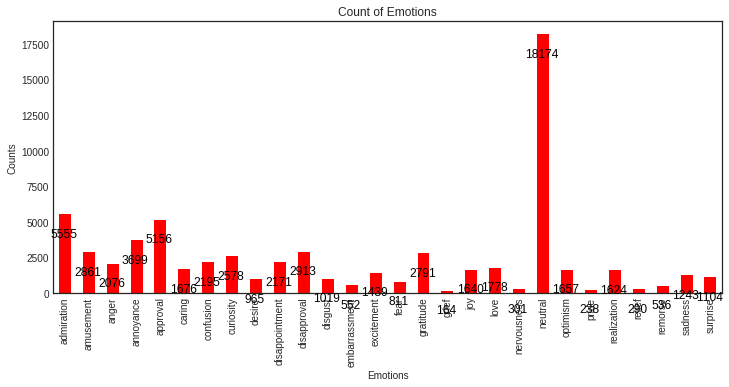

In [23]:
ax=emotions['emotion'].value_counts().sort_index().plot(kind='bar', 
                                                     title='Count of Emotions', figsize=(12,5),
                                                     color='r', 
                                                     xlabel='Emotions', ylabel='Counts')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12);

### **Comments in each index**

In [24]:
text1 = emotions['text'][17]

In [25]:
text1

"This video doesn't even show the shoes he was wearing..."

## **Tokenizing a sentence**

In [27]:
tk1 = nltk.word_tokenize(text1)

In [ ]:
tk1

['This',
 'video',
 'does',
 "n't",
 'even',
 'show',
 'the',
 'shoes',
 'he',
 'was',
 'wearing',
 '...']

## **Part of speech tagging**

In [29]:
nltk.pos_tag(tk1)

[('This', 'DT'),
 ('video', 'NN'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('even', 'RB'),
 ('show', 'VB'),
 ('the', 'DT'),
 ('shoes', 'NNS'),
 ('he', 'PRP'),
 ('was', 'VBD'),
 ('wearing', 'VBG'),
 ('...', ':')]

## **Sentiment Analysis, polarity score**

In [31]:
senta = SentimentIntensityAnalyzer()

In [32]:
senta.polarity_scores(emotions['text'][17])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [33]:
emotions['text'][3000]

'Kind of like how menat enraged the average player'

In [34]:
senta.polarity_scores(emotions['text'][3000])

{'neg': 0.221, 'neu': 0.574, 'pos': 0.205, 'compound': -0.0516}

In [35]:
emotions['text'][9000]

'DonÃ¢Â€Â™t hate barstool'

In [36]:
senta.polarity_scores(emotions['text'][9000])

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

### **Sentiment polarity score for the entire dataset**

In [37]:
res = {}
for i, row in tqdm(emotions.iterrows(), total=len(emotions)):
  text = row['text']
  myid = row['ID']
  res[myid] = senta.polarity_scores(text)

  0%|          | 0/67206 [00:00<?, ?it/s]

In [38]:
res

{0: {'neg': 0.63, 'neu': 0.37, 'pos': 0.0, 'compound': -0.5267},
 1: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.099, 'neu': 0.609, 'pos': 0.293, 'compound': 0.6239},
 4: {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.6297},
 5: {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4939},
 6: {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.69},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.438},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.3182},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.8176},
 13: {'neg': 0.074, 'neu': 0.814, 'pos': 0.112, 'compound': 0.25},
 14: {'neg': 0.0, 'neu': 0.409, 'pos': 0.591, 'compound': 0.9001},
 15: {'neg': 0.0, 'neu': 0.652, 'p

In [39]:
vaders =pd.DataFrame(res).T

In [40]:
vaders.head()

,neg,neu,pos,compound
0,0.630,0.370,0.000,-0.5267
1,0.000,0.323,0.677,0.6369
2,0.000,1.000,0.000,0.0000
3,0.099,0.609,0.293,0.6239
4,0.000,0.829,0.171,0.6297


In [41]:
vaders = vaders.reset_index().rename(columns={'index':'ID'})
vaders = vaders.merge(emotions, how='left')

In [42]:
vaders.head()

,ID,neg,neu,pos,compound,text,emotion
0,0,0.630,0.370,0.000,-0.5267,That game hurt.,sadness
1,1,0.000,0.323,0.677,0.6369,Man I love reddit.,love
2,2,0.000,1.000,0.000,0.0000,"[NAME] was nowhere near them, he was by the Fa...",neutral
3,3,0.099,0.609,0.293,0.6239,Right? Considering itÃ¢Â€Â™s such an important...,gratitude
4,4,0.000,0.829,0.171,0.6297,"He isn't as big, but he's still quite popular....",disapproval


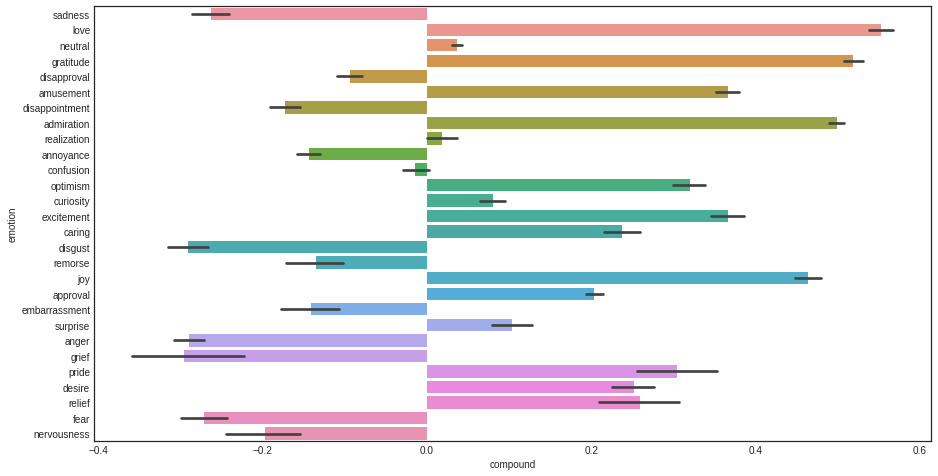

In [43]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=vaders, x='compound', y='emotion')

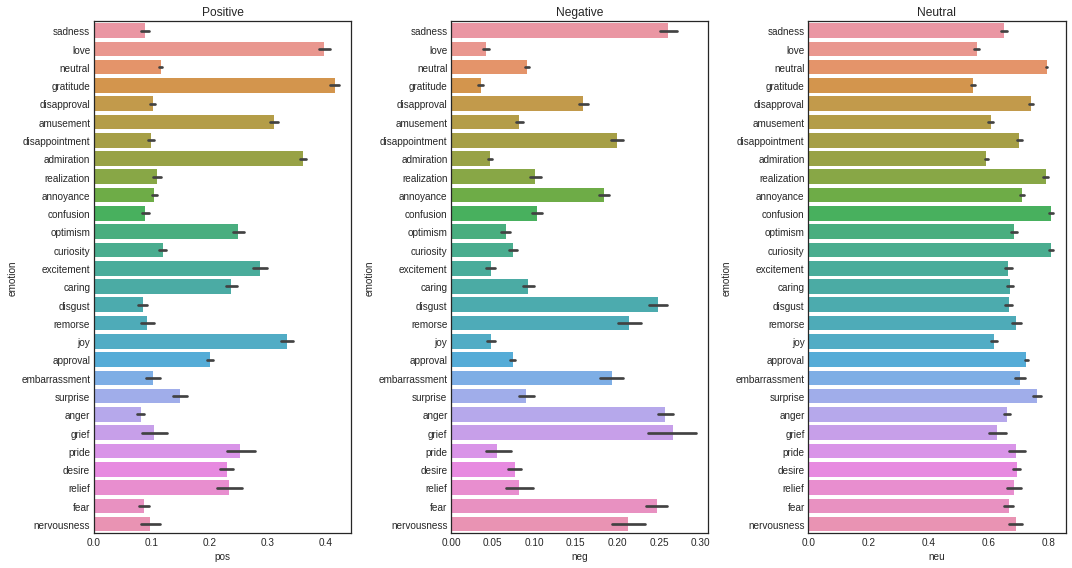

In [44]:
fig, axs = plt.subplots(1,3,figsize=(15,8))
sns.barplot(data=vaders,x='pos', y='emotion', ax=axs[0])
sns.barplot(data=vaders,x='neg', y='emotion', ax=axs[1])
sns.barplot(data=vaders,x='neu', y='emotion', ax=axs[2])
ax=axs[0].set_title('Positive')
ax=axs[1].set_title('Negative')
ax=axs[2].set_title('Neutral')
plt.tight_layout();

In [45]:
vaders3 = vaders

In [46]:
def custom_encoder(vaders3):
    vaders.replace(to_replace ="surprise", value =1, inplace=True)
    vaders.replace(to_replace ="love", value =1, inplace=True)
    vaders.replace(to_replace ="joy", value =1, inplace=True)
    vaders.replace(to_replace ="fear", value =0, inplace=True)
    vaders.replace(to_replace ="anger", value =0, inplace=True)
    vaders.replace(to_replace ="sadness", value =0, inplace=True)
    vaders.replace(to_replace ="gratitude", value =1, inplace=True)
    vaders.replace(to_replace ="admiration", value =1, inplace=True)
    vaders.replace(to_replace ="optimism", value =1, inplace=True)
    vaders.replace(to_replace ="excitement", value =1, inplace=True)
    vaders.replace(to_replace ="caring", value =1, inplace=True)
    vaders.replace(to_replace ="approval", value =1, inplace=True)
    vaders.replace(to_replace ="pride", value =1, inplace=True)
    vaders.replace(to_replace ="desire", value =1, inplace=True)
    vaders.replace(to_replace ="relief", value =1, inplace=True)
    vaders.replace(to_replace ="disapproval", value =0, inplace=True)
    vaders.replace(to_replace ="disappointment", value =0, inplace=True)
    vaders.replace(to_replace ="annoyance", value =0, inplace=True)
    vaders.replace(to_replace ="disgust", value =0, inplace=True)
    vaders.replace(to_replace ="remorse", value =0, inplace=True)
    vaders.replace(to_replace ="embarrassment", value =0, inplace=True)
    vaders.replace(to_replace ="grief", value =0, inplace=True)
    vaders.replace(to_replace ="nervousness", value =0, inplace=True)
    vaders.replace(to_replace ="neutral", value =2, inplace=True)
    vaders.replace(to_replace ="amusement", value =1, inplace=True)
    vaders.replace(to_replace ="realization", value =2, inplace=True)
    vaders.replace(to_replace ="confusion", value =0, inplace=True)
    vaders.replace(to_replace ="curiosity", value =2, inplace=True)

In [47]:
custom_encoder(vaders3['emotion'])

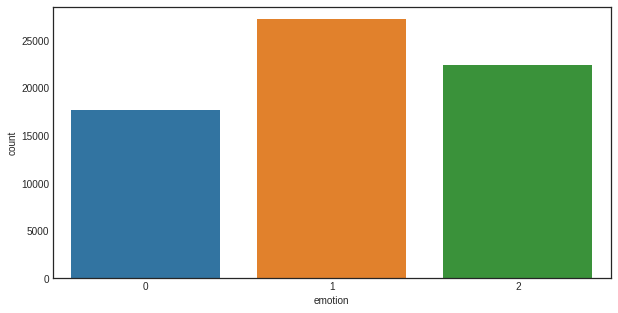

In [48]:
sns.countplot(vaders3.emotion);

In [49]:
vaders3.head()

,ID,neg,neu,pos,compound,text,emotion
0,0,0.630,0.370,0.000,-0.5267,That game hurt.,0
1,1,0.000,0.323,0.677,0.6369,Man I love reddit.,1
2,2,0.000,1.000,0.000,0.0000,"[NAME] was nowhere near them, he was by the Fa...",2
3,3,0.099,0.609,0.293,0.6239,Right? Considering itÃ¢Â€Â™s such an important...,1
4,4,0.000,0.829,0.171,0.6297,"He isn't as big, but he's still quite popular....",0


In [50]:
def Courses_Sentiment(row):
    if row["pos"] >= 0.5:
        return 'Positive'
    elif row["neg"] >= 0.5:
        return 'Negative'
    else:
        return 'Neutral'
vaders3 = vaders3.assign(Sentiment=vaders3.apply(Courses_Sentiment, axis=1))
print(vaders3)

          ID    neg    neu    pos  compound  \
0          0  0.630  0.370  0.000   -0.5267   
1          1  0.000  0.323  0.677    0.6369   
2          2  0.000  1.000  0.000    0.0000   
3          3  0.099  0.609  0.293    0.6239   
4          4  0.000  0.829  0.171    0.6297   
...      ...    ...    ...    ...       ...   
67201  67201  0.000  0.906  0.094    0.3612   
67202  67202  0.000  0.695  0.305    0.6588   
67203  67203  0.175  0.616  0.209    0.1779   
67204  67204  0.286  0.714  0.000   -0.1531   
67205  67205  0.576  0.424  0.000   -0.8468   

                                                    text  emotion Sentiment  
0                                        That game hurt.        0  Negative  
1                                     Man I love reddit.        1  Positive  
2      [NAME] was nowhere near them, he was by the Fa...        2   Neutral  
3      Right? Considering itÃ¢Â€Â™s such an important...        1   Neutral  
4      He isn't as big, but he's still quite 

In [51]:
vaders3.head(10)

,ID,neg,neu,pos,compound,text,emotion,Sentiment
0,0,0.630,0.370,0.000,-0.5267,That game hurt.,0,Negative
1,1,0.000,0.323,0.677,0.6369,Man I love reddit.,1,Positive
2,2,0.000,1.000,0.000,0.0000,"[NAME] was nowhere near them, he was by the Fa...",2,Neutral
3,3,0.099,0.609,0.293,0.6239,Right? Considering itÃ¢Â€Â™s such an important...,1,Neutral
4,4,0.000,0.829,0.171,0.6297,"He isn't as big, but he's still quite popular....",0,Neutral
5,5,0.000,0.385,0.615,0.4939,that's adorable asf,1,Positive
6,6,0.000,0.637,0.363,0.6900,Sponge Blurb Pubs Quaw Haha GURR ha AAa! final...,1,Neutral
7,7,0.000,1.000,0.000,0.0000,"I have, and now that you mention it, I think t...",2,Neutral
8,8,0.000,0.757,0.243,0.4380,"I wanted to downvote this, but it's not your f...",0,Neutral
9,9,0.000,1.000,0.000,0.0000,BUT IT'S HER TURN! /s,2,Neutral


In [52]:
vaders2 = vaders3

In [53]:
vaders2.head()

,ID,neg,neu,pos,compound,text,emotion,Sentiment
0,0,0.630,0.370,0.000,-0.5267,That game hurt.,0,Negative
1,1,0.000,0.323,0.677,0.6369,Man I love reddit.,1,Positive
2,2,0.000,1.000,0.000,0.0000,"[NAME] was nowhere near them, he was by the Fa...",2,Neutral
3,3,0.099,0.609,0.293,0.6239,Right? Considering itÃ¢Â€Â™s such an important...,1,Neutral
4,4,0.000,0.829,0.171,0.6297,"He isn't as big, but he's still quite popular....",0,Neutral


In [54]:
vaders2 = vaders2.drop([ 'neg', 'neu','pos','compound'], axis=1)

In [55]:
vaders2.head()

,ID,text,emotion,Sentiment
0,0,That game hurt.,0,Negative
1,1,Man I love reddit.,1,Positive
2,2,"[NAME] was nowhere near them, he was by the Fa...",2,Neutral
3,3,Right? Considering itÃ¢Â€Â™s such an important...,1,Neutral
4,4,"He isn't as big, but he's still quite popular....",0,Neutral


In [56]:
cnt3 = vaders2.groupby(['Sentiment']).count()

In [57]:
cnt3

,ID,text,emotion
Sentiment,,,
Negative,1831,1831,1831
Neutral,59562,59562,59562
Positive,5813,5813,5813


In [182]:
cnt4 = vaders2.groupby(['Sentiment']).count().sum()

In [183]:
cnt4

ID         67206
text       67206
emotion    67206
dtype: int64

In [58]:
vaders2.reset_index()

,index,ID,text,emotion,Sentiment
0,0,0,That game hurt.,0,Negative
1,1,1,Man I love reddit.,1,Positive
2,2,2,"[NAME] was nowhere near them, he was by the Fa...",2,Neutral
3,3,3,Right? Considering itÃ¢Â€Â™s such an important...,1,Neutral
4,4,4,"He isn't as big, but he's still quite popular....",0,Neutral
...,...,...,...,...,...
67201,67201,67201,"Before we continue, I would first like to ask ...",2,Neutral
67202,67202,67202,This is great! Can anyone make a request with ...,1,Neutral
67203,67203,67203,IÃ¢Â€Â™m sorry. Can you please explain what ar...,2,Neutral
67204,67204,67204,No but it should be,2,Neutral


In [59]:
vaders2.set_index('ID')

,text,emotion,Sentiment
ID,,,
0,That game hurt.,0,Negative
1,Man I love reddit.,1,Positive
2,"[NAME] was nowhere near them, he was by the Fa...",2,Neutral
3,Right? Considering itÃ¢Â€Â™s such an important...,1,Neutral
4,"He isn't as big, but he's still quite popular....",0,Neutral
...,...,...,...
67201,"Before we continue, I would first like to ask ...",2,Neutral
67202,This is great! Can anyone make a request with ...,1,Neutral
67203,IÃ¢Â€Â™m sorry. Can you please explain what ar...,2,Neutral


In [60]:
vaders2.reset_index()

,index,ID,text,emotion,Sentiment
0,0,0,That game hurt.,0,Negative
1,1,1,Man I love reddit.,1,Positive
2,2,2,"[NAME] was nowhere near them, he was by the Fa...",2,Neutral
3,3,3,Right? Considering itÃ¢Â€Â™s such an important...,1,Neutral
4,4,4,"He isn't as big, but he's still quite popular....",0,Neutral
...,...,...,...,...,...
67201,67201,67201,"Before we continue, I would first like to ask ...",2,Neutral
67202,67202,67202,This is great! Can anyone make a request with ...,1,Neutral
67203,67203,67203,IÃ¢Â€Â™m sorry. Can you please explain what ar...,2,Neutral
67204,67204,67204,No but it should be,2,Neutral


In [61]:
vaders2.head()

,ID,text,emotion,Sentiment
0,0,That game hurt.,0,Negative
1,1,Man I love reddit.,1,Positive
2,2,"[NAME] was nowhere near them, he was by the Fa...",2,Neutral
3,3,Right? Considering itÃ¢Â€Â™s such an important...,1,Neutral
4,4,"He isn't as big, but he's still quite popular....",0,Neutral


In [62]:
cnt3 = vaders2.groupby(['Sentiment']).count()

In [63]:
cnt3

,ID,text,emotion
Sentiment,,,
Negative,1831,1831,1831
Neutral,59562,59562,59562
Positive,5813,5813,5813


### **Create a WordNetLemmatizer**

In [64]:
lm = WordNetLemmatizer()

In [65]:
# Create a function to transform the data as follows:

def text_transformation(vaders2_col):
    corpus = []
    for item in vaders2_col:
       # remove punctuation characters.
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        # convert to lower case.
        new_item = new_item.lower()
        new_item = new_item.split()
        # lemmatize and remove stop words.
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        # append to corpus and return as a transformed corpus.
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [125]:
# Assign transformed text to the corpus.
corpus = text_transformation(vaders2['text'])

In [126]:
corpus

['game hurt',
 'man love reddit',
 'name nowhere near falcon',
 'right considering important document know damned thing backwards forward thanks help',
 'big still quite popular heard thing content never watched much',
 'adorable asf',
 'sponge blurb pub quaw haha gurr ha aaa finale real',
 'mention think triggered nostalgia',
 'wanted downvote fault homie',
 'turn',
 'odd',
 'build wall jk',
 'appreciate good know hope apply knowledge one day',
 'one time stopped right st able get good photo platform since light along',
 'well say pretty good chance girl lol',
 'pretty much every punjabi dude met',
 'extra measure tape right crotch take sexual assault reason',
 'video even show shoe wearing',
 'clemson give pride sticker snap played',
 'may die sacrifice willing make',
 'wondering missing thank',
 'definitely fit r boneappletea',
 'seeeee one coloureds',
 'remindme month',
 'yup anymore keep blood sugar really help drink water',
 'lot play store apple store vpn nord good',
 'happy nam

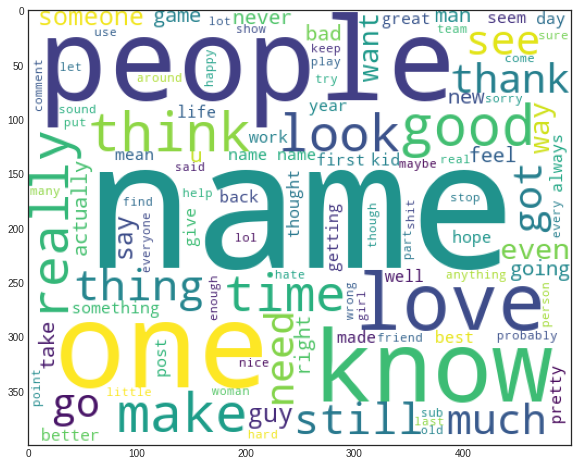

In [127]:
# Create a word cloud to show word density
rcParams['figure.figsize'] = 10,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 500, height = 400,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud);

In [128]:
# Create a bigram with range (1,2) to permit dual word combinations
cv = CountVectorizer(ngram_range=(1,3))
data = cv.fit_transform(corpus)

In [129]:
# Assign X and y
X = data
y = vaders2.Sentiment

In [130]:
y

0        Negative
1        Positive
2         Neutral
3         Neutral
4         Neutral
           ...   
67201     Neutral
67202     Neutral
67203     Neutral
67204     Neutral
67205    Negative
Name: Sentiment, Length: 67206, dtype: object

In [119]:
X

<67206x383082 sparse matrix of type '<class 'numpy.int64'>'
	with 1094744 stored elements in Compressed Sparse Row format>

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [132]:
y_train

60803    Positive
36172     Neutral
11343     Neutral
63947     Neutral
42046     Neutral
           ...   
37194     Neutral
6265      Neutral
54886     Neutral
860       Neutral
15795     Neutral
Name: Sentiment, Length: 47044, dtype: object

### **Logistic regression model**

In [133]:
model = LogisticRegression(max_iter = X_train.shape[1])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [134]:
accuracy_score(y_test, y_pred)


0.9461858942565222

In [135]:
model.score(X_test,y_test)

0.9461858942565222

In [101]:
vaders2.head()

,ID,text,emotion,Sentiment
0,0,That game hurt.,0,Negative
1,1,Man I love reddit.,1,Positive
2,2,"[NAME] was nowhere near them, he was by the Fa...",2,Neutral
3,3,Right? Considering itÃ¢Â€Â™s such an important...,1,Neutral
4,4,"He isn't as big, but he's still quite popular....",0,Neutral


In [102]:
emotions.head()

,ID,text,emotion
0,0,That game hurt.,sadness
1,1,Man I love reddit.,love
2,2,"[NAME] was nowhere near them, he was by the Fa...",neutral
3,3,Right? Considering itÃ¢Â€Â™s such an important...,gratitude
4,4,"He isn't as big, but he's still quite popular....",disapproval


### **Confusion Matrix**

In [136]:
conm1 = confusion_matrix(y_test, y_pred)

In [137]:
conm1

array([[  244,   319,     9],
       [   28, 17591,   254],
       [    1,   474,  1242]])

In [181]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.89      0.43      0.58       572
     Neutral       0.96      0.98      0.97     17873
    Positive       0.83      0.72      0.77      1717

    accuracy                           0.95     20162
   macro avg       0.89      0.71      0.77     20162
weighted avg       0.94      0.95      0.94     20162

0.9461858942565222


In [154]:
cm_df = pd.DataFrame(conm1,
                     index = ['Negative','Neutral','Positive'], 
                     columns = ['Negative','Neutral','Positive'])

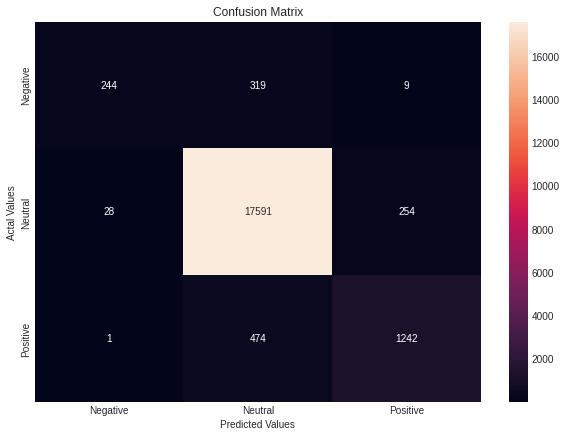

In [163]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

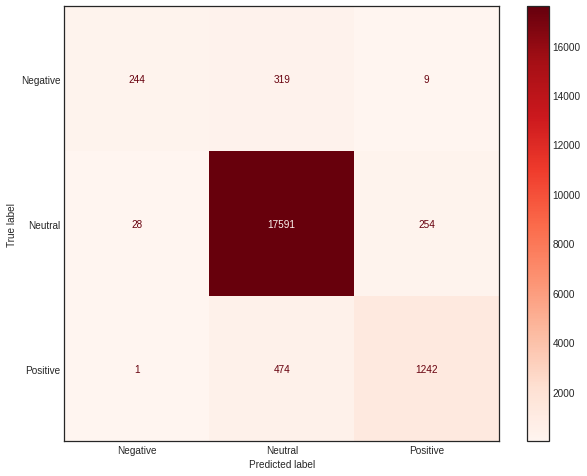

In [179]:
matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)